In [19]:
import pandas as pd

weather= pd.read_csv("weather.csv",index_col="DATE")

In [227]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
2010-08-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,74.0,52.0,71.0
2010-08-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,57.0,65.0
2010-08-27,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,65.0,57.0,72.0
2010-08-28,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,72.0,53.0,71.0
2010-08-29,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,51.0,73.0
...,...,...,...,...,...,...
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0
2024-04-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,44.0,28.0,38.0


In [229]:
weather.shape

(4905, 6)

In [231]:
#Total number of null values for each column
weather.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
target     1
dtype: int64

In [233]:
#Percentage of values missing in each column
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.000000
TMAX       0.000000
TMIN       0.000000
target     0.000204
dtype: float64

In [235]:
#removing columns that have null values more than 50%
valid_columns=weather.columns[null_pct<0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN', 'target'], dtype='object')

In [237]:
#filtering the original data with only valid columns
weather=weather[valid_columns].copy()

In [239]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
2010-08-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,74.0,52.0,71.0
2010-08-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,57.0,65.0
2010-08-27,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,65.0,57.0,72.0
2010-08-28,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,72.0,53.0,71.0
2010-08-29,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,51.0,73.0
...,...,...,...,...,...,...
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0
2024-04-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,44.0,28.0,38.0


In [241]:
#fill in the missing values
weather=weather.ffill()

In [243]:
weather.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
target     0
dtype: int64

In [245]:
weather.index

DatetimeIndex(['2010-08-25', '2010-08-26', '2010-08-27', '2010-08-28',
               '2010-08-29', '2010-08-30', '2010-08-31', '2010-09-01',
               '2010-09-02', '2010-09-03',
               ...
               '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-27', '2024-04-28'],
              dtype='datetime64[ns]', name='DATE', length=4905, freq=None)

In [247]:
#changing object type to date time format for easy access to year/month/date.
weather.index=pd.to_datetime(weather.index)

In [66]:
weather.index

DatetimeIndex(['2010-08-25', '2010-08-26', '2010-08-27', '2010-08-28',
               '2010-08-29', '2010-08-30', '2010-08-31', '2010-09-01',
               '2010-09-02', '2010-09-03',
               ...
               '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-27', '2024-04-28'],
              dtype='datetime64[ns]', name='DATE', length=4905, freq=None)

In [72]:
#lets check how many records we have for each year
weather.index.year.value_counts().sort_index()

DATE
2010    128
2011    362
2012    342
2013    337
2014    361
2015    363
2016    366
2017    360
2018    360
2019    363
2020    360
2021    358
2022    363
2023    363
2024    119
Name: count, dtype: int64

In [277]:
#We want to use todays data to predict tomorrows data (target)
#we are going to create a target column 
weather['target']=weather.shift(-1)['TMAX']
#simply takes tomorrows Tmax value and makes it a target value for previous day

In [279]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
2010-08-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,74.0,52.0,71.0
2010-08-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,57.0,65.0
2010-08-27,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,65.0,57.0,72.0
2010-08-28,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,72.0,53.0,71.0
2010-08-29,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,51.0,73.0
...,...,...,...,...,...,...
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0
2024-04-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,44.0,28.0,38.0


In [281]:
weather.isna().sum()

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
target     1
dtype: int64

In [287]:
weather = weather.dropna(subset=['target'])

In [291]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
2010-08-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,74.0,52.0,71.0
2010-08-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,57.0,65.0
2010-08-27,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,65.0,57.0,72.0
2010-08-28,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,72.0,53.0,71.0
2010-08-29,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,51.0,73.0
...,...,...,...,...,...,...
2024-04-23,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,47.0,29.0,51.0
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0


In [293]:
# we are going to apply ridge regression model
from sklearn.linear_model import Ridge

rr=Ridge(alpha=0.1)

In [295]:
#create a list predictor column
#these columns will predict out target
predictors=weather.columns[~weather.columns.isin(['target','NAME','STATION'])]

In [297]:
predictors

Index(['PRCP', 'TMAX', 'TMIN'], dtype='object')

In [299]:
def backtest(weather, model, predictors, start=3650, step=90):
   
    ##Backtests a predictive model on weather data by splitting it into training and testing datasets.
    # List to store the results of predictions for each backtest iteration
    all_predictions = []

    # Loop through the data in steps, starting from the `start` index
    for i in range(start, weather.shape[0], step):
        # Define the training set: from the beginning up to the current index `i`
        train = weather.iloc[:i, :]
        # Define the testing set: from index `i` to `i + step`
        test = weather.iloc[i:(i + step), :]

        # Fit the model using the predictors and the target column on the training set
        model.fit(train[predictors], train['target'])
        # Make predictions for the testing set using the trained model
        preds = model.predict(test[predictors])
        # Convert predictions to a pandas Series with the same index as the test set
        preds = pd.Series(preds, index=test.index)

        # Combine the actual target values and predictions into a single DataFrame
        combined = pd.concat([test['target'], preds], axis=1)
        # Rename columns for clarity
        combined.columns = ['actual', 'prediction']
        # Calculate the absolute difference between actual and predicted values
        combined['diff'] = (combined['prediction'] - combined['actual']).abs()
        # Append the results to the list
        all_predictions.append(combined)

    # Concatenate all the results into a single DataFrame and return it
    return pd.concat(all_predictions)



In [301]:
predictions=backtest(weather,rr,predictors)

In [303]:
predictions

,actual,prediction,diff
DATE,,,
2020-11-10,55.0,55.336692,0.336692
2020-11-11,58.0,54.374705,3.625295
2020-11-12,44.0,56.488461,12.488461
2020-11-13,36.0,45.707470,9.707470
2020-11-14,36.0,37.397675,1.397675
...,...,...,...
2024-04-23,51.0,46.657460,4.342540
2024-04-24,54.0,49.136601,4.863399
2024-04-25,44.0,51.313184,7.313184


In [305]:
#lets check how affective our algorithm was
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions['actual'],predictions['prediction'])

5.533766672672287

In [ ]:
#This means on average we were 5.5 degrees off in prediction

In [311]:
#lets improve accuracy by calculating avg temperature and precipitation of past number of days and check how current day compares to those days
def pct_diff(old,new):
    return (new-old)/old

#this function calculates the rolling average
def compute_rolling(weather,horizon,col):
    label=f'rolling_{horizon}_{col}'

    weather[label]=weather[col].rolling(horizon).mean()
    weather[f'{label}_pct']=pct_diff(weather[label],weather[col])
    return weather
    
rolling_horizons=[3,14]
for horizon in rolling_horizons:
    for col in ['TMAX','TMIN','PRCP']:
        weather=compute_rolling(weather,horizon,col)

/var/folders/r_/sgf0b5c93zj6f66djm0x864r0000gn/T/ipykernel_79523/3489267675.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[label]=weather[col].rolling(horizon).mean()
/var/folders/r_/sgf0b5c93zj6f66djm0x864r0000gn/T/ipykernel_79523/3489267675.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[f'{label}_pct']=pct_diff(weather[label],weather[col])
/var/folders/r_/sgf0b5c93zj6f66djm0x864r0000gn/T/ipykernel_79523/3489267675.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

In [313]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,
2010-08-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,74.0,52.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-26,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,57.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-27,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,65.0,57.0,72.0,70.000000,-0.071429,55.333333,0.030120,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-28,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,72.0,53.0,71.0,69.333333,0.038462,55.666667,-0.047904,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-29,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,71.0,51.0,73.0,69.333333,0.024038,53.666667,-0.049689,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,47.0,29.0,51.0,49.333333,-0.047297,31.000000,-0.064516,0.043333,-1.00000,47.357143,-0.007541,33.928571,-0.145263,0.129286,-1.000000
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0,51.333333,-0.006494,31.666667,0.042105,0.106667,1.90625,48.642857,0.048458,34.357143,-0.039501,0.148571,1.086538
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0,50.666667,0.065789,30.666667,-0.021739,0.106667,-0.90625,49.357143,0.094067,34.428571,-0.128631,0.149286,-0.933014


In [315]:
#REMOVE FIRST 14 DAYS AS DATA NOT PRESENT
weather=weather.iloc[14:,:]

In [339]:
weather
weather.fillna(0)

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,month_avg_TMIN,month_avg_PRCP,day_avg_TMAX,day_avg_TMIN,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
2010-09-08,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.02,57.0,52.0,59.0,66.000000,-0.136364,53.666667,-0.031056,...,54.857143,-0.052083,0.019286,0.037037,57.000000,52.000000,0.020000,57.000000,52.000000,0.020000
2010-09-09,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.66,59.0,51.0,65.0,61.666667,-0.043243,52.333333,-0.025478,...,54.428571,-0.062992,0.066429,8.935484,58.000000,51.500000,0.340000,59.000000,51.000000,0.660000
2010-09-10,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",1.19,65.0,55.0,68.0,60.333333,0.077348,52.666667,0.044304,...,54.285714,0.013158,0.151429,6.858491,60.333333,52.666667,0.623333,65.000000,55.000000,1.190000
2010-09-11,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.05,68.0,52.0,53.0,64.000000,0.062500,52.666667,-0.012658,...,54.214286,-0.040843,0.155000,-0.677419,62.250000,52.500000,0.480000,68.000000,52.000000,0.050000
2010-09-12,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.18,53.0,49.0,53.0,62.000000,-0.145161,52.000000,-0.057692,...,54.071429,-0.093791,0.167857,0.072340,60.400000,51.800000,0.420000,53.000000,49.000000,0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,47.0,29.0,51.0,49.333333,-0.047297,31.000000,-0.064516,...,33.928571,-0.145263,0.129286,-1.000000,43.167883,29.296837,0.140097,44.571429,30.857143,0.185714
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0,51.333333,-0.006494,31.666667,0.042105,...,34.357143,-0.039501,0.148571,1.086538,43.186893,29.305825,0.140510,46.642857,31.714286,0.151429
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0,50.666667,0.065789,30.666667,-0.021739,...,34.428571,-0.128631,0.149286,-0.933014,43.213075,29.307506,0.140194,47.857143,33.571429,0.155000


In [325]:
#predictors
def expand_mean(df):
    return df.expanding(1).mean()
for col in ['TMAX',"TMIN","PRCP"]:
    weather[f'month_avg_{col}']=weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f'day_avg_{col}']=weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
    

/var/folders/r_/sgf0b5c93zj6f66djm0x864r0000gn/T/ipykernel_79523/2001797945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[f'month_avg_{col}']=weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
/var/folders/r_/sgf0b5c93zj6f66djm0x864r0000gn/T/ipykernel_79523/2001797945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[f'day_avg_{col}']=weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
/var/folders/r_/sgf0b5c93zj6f66djm0x86

In [327]:
weather

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,month_avg_TMIN,month_avg_PRCP,day_avg_TMAX,day_avg_TMIN,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
2010-09-08,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.02,57.0,52.0,59.0,66.000000,-0.136364,53.666667,-0.031056,...,54.857143,-0.052083,0.019286,0.037037,57.000000,52.000000,0.020000,57.000000,52.000000,0.020000
2010-09-09,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.66,59.0,51.0,65.0,61.666667,-0.043243,52.333333,-0.025478,...,54.428571,-0.062992,0.066429,8.935484,58.000000,51.500000,0.340000,59.000000,51.000000,0.660000
2010-09-10,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",1.19,65.0,55.0,68.0,60.333333,0.077348,52.666667,0.044304,...,54.285714,0.013158,0.151429,6.858491,60.333333,52.666667,0.623333,65.000000,55.000000,1.190000
2010-09-11,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.05,68.0,52.0,53.0,64.000000,0.062500,52.666667,-0.012658,...,54.214286,-0.040843,0.155000,-0.677419,62.250000,52.500000,0.480000,68.000000,52.000000,0.050000
2010-09-12,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.18,53.0,49.0,53.0,62.000000,-0.145161,52.000000,-0.057692,...,54.071429,-0.093791,0.167857,0.072340,60.400000,51.800000,0.420000,53.000000,49.000000,0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.00,47.0,29.0,51.0,49.333333,-0.047297,31.000000,-0.064516,...,33.928571,-0.145263,0.129286,-1.000000,43.167883,29.296837,0.140097,44.571429,30.857143,0.185714
2024-04-24,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.31,51.0,33.0,54.0,51.333333,-0.006494,31.666667,0.042105,...,34.357143,-0.039501,0.148571,1.086538,43.186893,29.305825,0.140510,46.642857,31.714286,0.151429
2024-04-25,CA008403603,"ST JOHNS WEST CLIMATE, NL CA",0.01,54.0,30.0,44.0,50.666667,0.065789,30.666667,-0.021739,...,34.428571,-0.128631,0.149286,-0.933014,43.213075,29.307506,0.140194,47.857143,33.571429,0.155000


In [331]:
predictors=weather.columns[~weather.columns.isin(['target','NAME','STATION'])]

In [333]:
predictors

Index(['PRCP', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX', 'month_avg_TMIN',
       'month_avg_PRCP', 'day_avg_TMAX', 'day_avg_TMIN', 'day_avg_PRCP'],
      dtype='object')

In [335]:
mean_absolute_error(predictions['actual'],predictions['prediction'])

5.533766672672287

In [351]:
weather=weather.fillna(0)
weather.isna().sum()

STATION                0
NAME                   0
PRCP                   0
TMAX                   0
TMIN                   0
target                 0
rolling_3_TMAX         0
rolling_3_TMAX_pct     0
rolling_3_TMIN         0
rolling_3_TMIN_pct     0
rolling_3_PRCP         0
rolling_3_PRCP_pct     0
rolling_14_TMAX        0
rolling_14_TMAX_pct    0
rolling_14_TMIN        0
rolling_14_TMIN_pct    0
rolling_14_PRCP        0
rolling_14_PRCP_pct    0
month_avg_TMAX         0
month_avg_TMIN         0
month_avg_PRCP         0
day_avg_TMAX           0
day_avg_TMIN           0
day_avg_PRCP           0
dtype: int64

In [353]:
predictions=backtest(weather,rr,predictors)

In [355]:
mean_absolute_error(predictions['actual'],predictions['prediction'])

5.105387869214734

In [357]:
predictions.sort_values('diff',ascending=False)

,actual,prediction,diff
DATE,,,
2023-06-26,79.0,56.701788,22.298212
2021-06-07,83.0,60.977065,22.022935
2023-01-13,56.0,35.480571,20.519429
2024-03-28,58.0,37.901702,20.098298
2022-05-28,68.0,48.084509,19.915491
...,...,...,...
2024-03-03,38.0,37.981603,0.018397
2024-02-11,36.0,35.981696,0.018304
2021-11-02,52.0,51.989220,0.010780


<Axes: xlabel='diff'>

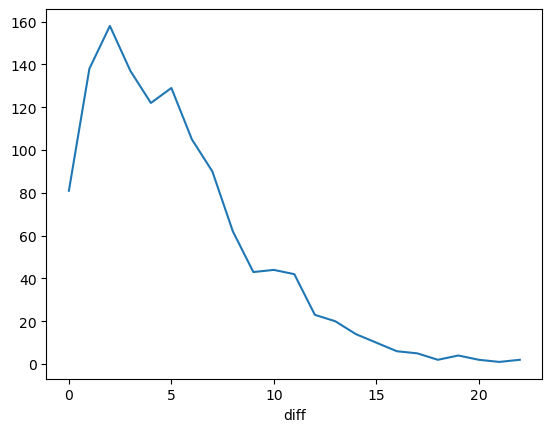

In [375]:
(predictions['diff'].round().value_counts().sort_index().plot())

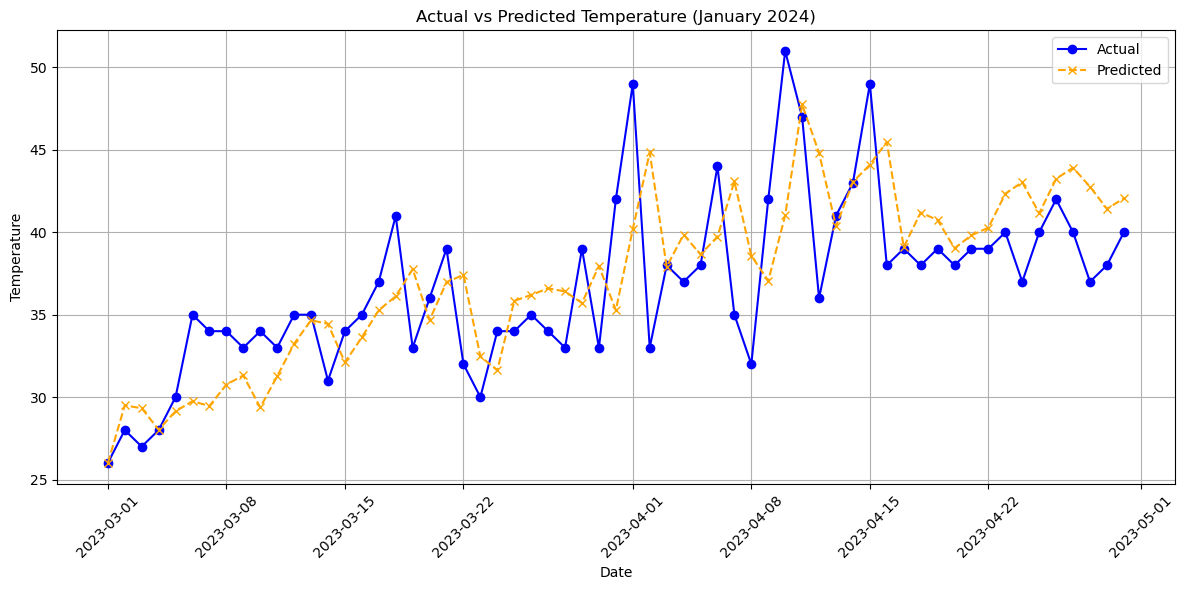

In [403]:

import matplotlib.pyplot as plt

# Filter data for January 2024
predictions_jan_2024 = predictions.loc['2023-03-01':'2023-04-30']

# Plot actual and predicted values
plt.figure(figsize=(12, 6))  # Set figure size

# Plot the actual values
plt.plot(predictions_jan_2024.index, predictions_jan_2024['actual'], label='Actual', marker='o', linestyle='-', color='blue')

# Plot the predicted values
plt.plot(predictions_jan_2024.index, predictions_jan_2024['prediction'], label='Predicted', marker='x', linestyle='--', color='orange')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (January 2024)')
plt.legend()
plt.grid(True)  # Optional: Add a grid for better readability

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
